**Задание 1.**   
- ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?   

Построить точечный график   
Рассчитать коэффициенты корреляции Пирсона и Спирмена   
Построить модель линейной регрессии   
Рассчитать коэффициент детерминации   
Вывести график остатков

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('stat/water.csv')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [3]:
df = data.drop('Unnamed: 0',1)
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


Визуализируем корреляционную матрицу с помощью тепловой карты

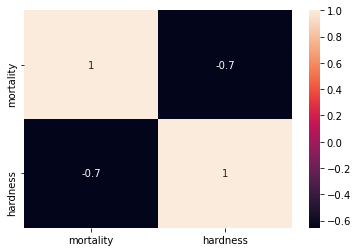

In [4]:
sns.heatmap(df.corr(), annot = True, fmt = '.1g')

Посмотрим на предполагаемые зависимости

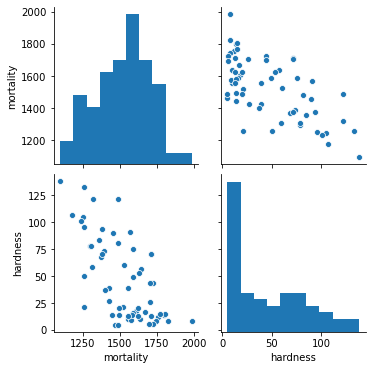

In [5]:
sns.pairplot(df)

Расположим жесткость воды по x, по y - смертность

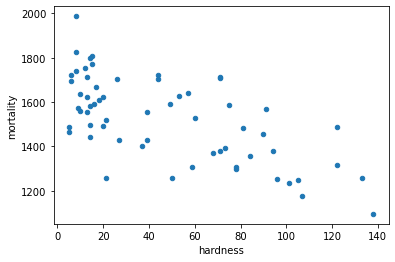

In [6]:
df.plot(kind='scatter', x = 'hardness', y = 'mortality')
# Гипотеза - слабая взаимосвязь наблюдается. Возможно, жесткость воды влияет на продолжительность жизни.
# Чем ниже жесткость - тем выше смертность?

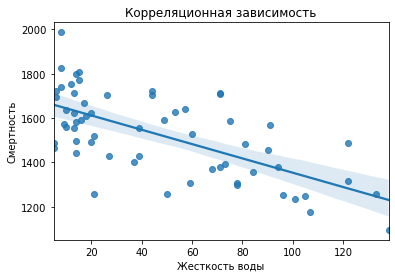

In [7]:
X = df['hardness']
Y = df['mortality']
sns.regplot(x = X, y = Y, fit_reg = True)
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Корреляционная зависимость')
plt.grid(False)
plt.show()

In [8]:
# Рассчитаем коэффициент корреляции Пирсона

df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [9]:
# Рассчитаем коэффициент корреляции Спирмена

df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [10]:
# Рассчитаем коэффициент корреляции Кенделла

df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


Построим модель линейной регрессии

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
X = df[['hardness']]
y = df['mortality']

Тестируем на 30% данных

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) # Дуглас Адамс? :-)

In [14]:
X_train.shape

(42, 1)

In [15]:
y_train.shape

(42,)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [17]:
model.coef_

array([-3.13167087])

In [18]:
model.intercept_

1668.9722977277095

In [19]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

Рассчитаем коэффициент детерминации

In [20]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации
# до 1 далеко, но результат неплохой

0.5046490611017092

Визуализируем

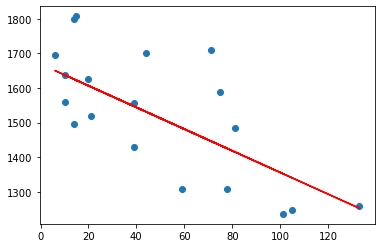

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

*Модель линейной регрессии указывает на то, что гипотеза о зависимости смертности от жесткости воды может рассматриваться.   
Чем ниже жесткость воды - тем выше летальность.*

Выводим график остатков

In [22]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
X_const = sm.add_constant(X_train) 

In [24]:
X_const.shape

(42, 2)

In [25]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           7.83e-06
Time:                        22:27:20   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [26]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
# коэф. детерминации в первом случае 0.50, коэф. детерминации здесь - 0.39

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912279


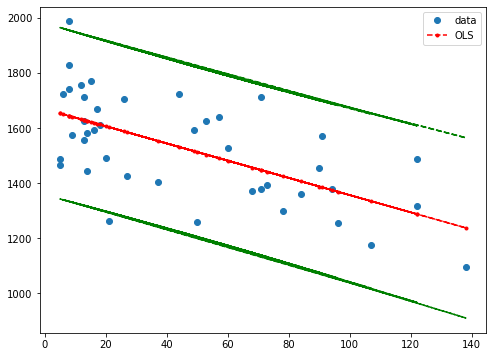

In [27]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

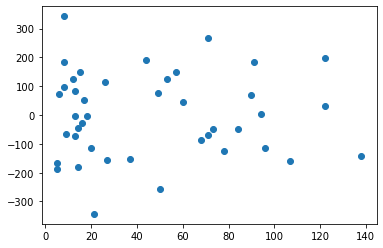

In [28]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

Остатки хаотичны, в них не проглядываюся закономерности, нет систематических составляющих. Можем отнести нашу модель к "хорошей".

(array([1., 1., 7., 5., 8., 4., 8., 6., 1., 1.]),
 array([-3.43207209e+02, -2.74578382e+02, -2.05949554e+02, -1.37320726e+02,
        -6.86918979e+01, -6.30700817e-02,  6.85657578e+01,  1.37194586e+02,
         2.05823414e+02,  2.74452241e+02,  3.43081069e+02]),
 <a list of 10 Patch objects>)

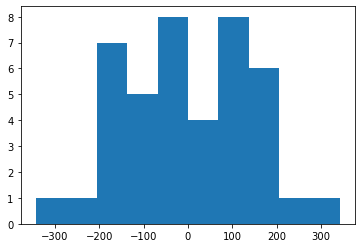

In [29]:
plt.hist(results.resid)

**Задание 2**   
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?   
Разделить данные на 2 группы   
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

**Посмотрим на Юг**

In [30]:
South = df.loc[df['location'] == 'South'].reset_index()
South.head()

,index,location,town,mortality,hardness
0,0,South,Bath,1247,105
1,2,South,Birmingham,1466,5
2,7,South,Bournemouth,1299,78
3,9,South,Brighton,1359,84
4,10,South,Bristol,1392,73


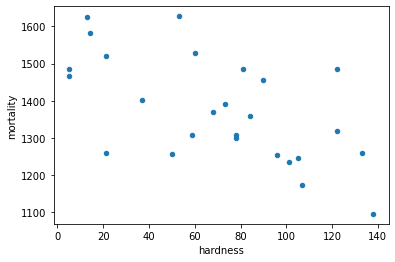

In [31]:
South.plot(kind='scatter', x = 'hardness', y = 'mortality')

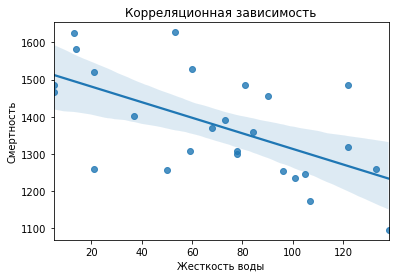

In [32]:
X = South['hardness']
Y = South['mortality']
sns.regplot(x = X, y = Y, fit_reg = True)
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Корреляционная зависимость')
plt.grid(False)
plt.show()

Посчитаем коэф. корреляции (Пирсон, Спирмен, Кенделл):

In [33]:
print(South[['mortality', 'hardness']].corr())
print(South[['mortality', 'hardness']].corr(method='spearman'))
print(South[['mortality', 'hardness']].corr(method='kendall'))

           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000
           mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000
           mortality  hardness
mortality   1.000000 -0.440315
hardness   -0.440315  1.000000


Построим модель линейной регрессии

In [45]:
XS = South[['hardness']]
yS = South['mortality']
XS_train, XS_test, yS_train, yS_test = train_test_split(XS, yS, test_size = 0.30)
model_S = LinearRegression()

In [46]:
model_S.fit(XS_train, yS_train)

LinearRegression()

In [47]:
model_S.coef_

array([-2.66730704])

In [48]:
model_S.intercept_

1552.9299792807906

In [49]:
y_pred_S = model_S.predict(XS_test)
y_pred_S

array([1515.58768077, 1227.51852084, 1312.872346  , 1328.87618822,
       1227.51852084, 1184.84160826, 1496.91653152, 1371.5531008 ])

Расчитаем коэффициент детерминации

In [51]:
model_S.score(XS_test, yS_test) # очень далёк от 1 

-0.0610624733718268

Визуализируем

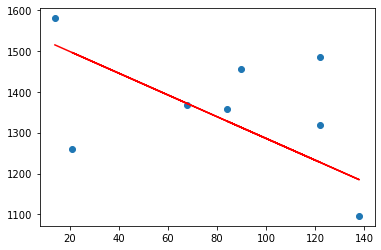

In [52]:
plt.scatter(XS_test, yS_test)
plt.plot(XS_test, y_pred_S, c='r')

Посмотрим на остатки

In [53]:
XS_const = sm.add_constant(XS_train) 
model_S = sm.OLS(yS_train, XS_const)
results_S = model_S.fit()

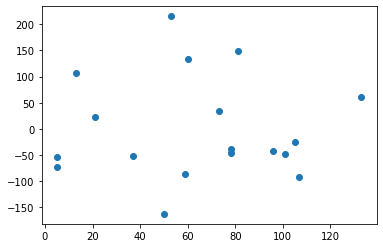

In [54]:
plt.scatter(XS_const.iloc[:, 1], results_S.resid)

(array([1., 1., 4., 5., 1., 2., 0., 2., 1., 1.]),
 array([-162.56462746, -124.76443535,  -86.96424324,  -49.16405113,
         -11.36385902,   26.43633309,   64.23652521,  102.03671732,
         139.83690943,  177.63710154,  215.43729365]),
 <a list of 10 Patch objects>)

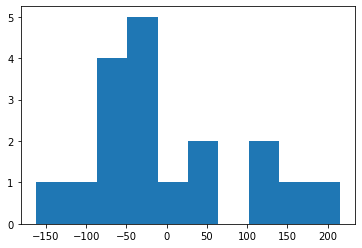

In [55]:
plt.hist(results_S.resid)

**Посмотрим на Север**

In [56]:
North = df.loc[df['location'] == 'North'].reset_index()
North.head()

,index,location,town,mortality,hardness
0,1,North,Birkenhead,1668,17
1,3,North,Blackburn,1800,14
2,4,North,Blackpool,1609,18
3,5,North,Bolton,1558,10
4,6,North,Bootle,1807,15


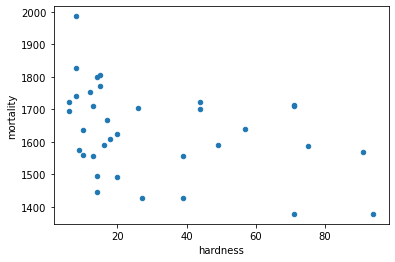

In [57]:
North.plot(kind='scatter', x = 'hardness', y = 'mortality')

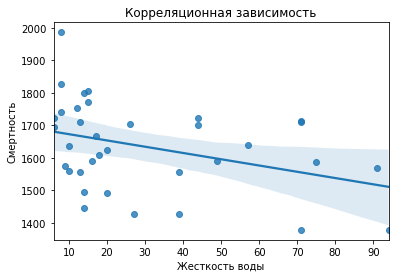

In [58]:
X = North['hardness']
Y = North['mortality']
sns.regplot(x = X, y = Y, fit_reg = True)
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Корреляционная зависимость')
plt.grid(False)
plt.show()

Посчитаем коэф. корреляции (Пирсон, Спирмен, Кенделл):

In [59]:
# коэффициенты корреляции намного ниже, чем ранее

print(North[['mortality', 'hardness']].corr())
print(North[['mortality', 'hardness']].corr(method='spearman'))
print(North[['mortality', 'hardness']].corr(method='kendall'))

           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000
           mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000
           mortality  hardness
mortality   1.000000 -0.283058
hardness   -0.283058  1.000000


Построим модель линейной регрессии

In [60]:
XN = North[['hardness']]
yN = North['mortality']
XN_train, XN_test, yN_train, yN_test = train_test_split(XN, yN, test_size = 0.30)

In [61]:
model_N = LinearRegression()

In [62]:
model_N.fit(XN_train, yN_train)

LinearRegression()

In [63]:
model_N.coef_

array([-2.76007639])

In [64]:
model_N.intercept_

1717.9707173893537

In [65]:
y_pred_N = model_N.predict(XN_test)
y_pred_N

array([1679.32964791, 1510.96498802, 1668.28934234, 1582.7269742 ,
       1684.84980069, 1690.36995347, 1522.00529358, 1701.41025904,
       1690.36995347, 1596.52735616, 1701.41025904])

Расчитаем коэффициент детерминации

In [66]:
model_N.score(XN_test, yN_test) 

-0.641240720294737

Визуализируем

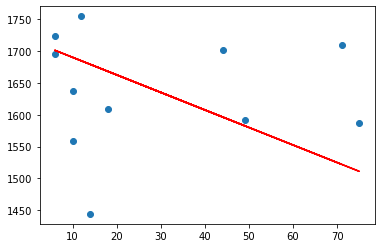

In [67]:
plt.scatter(XN_test, yN_test)
plt.plot(XN_test, y_pred_N, c='r')

Посмотрим на остатки

In [68]:
XN_const = sm.add_constant(XN_train) 
model_N = sm.OLS(yN_train, XN_const)
results_N = model_N.fit()

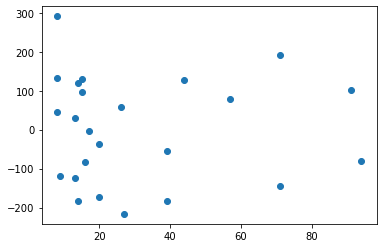

In [69]:
plt.scatter(XN_const.iloc[:, 1], results_N.resid)

(array([4., 3., 2., 2., 2., 3., 6., 0., 1., 1.]),
 array([-216.44865481, -165.69279996, -114.9369451 ,  -64.18109025,
         -13.42523539,   37.33061946,   88.08647432,  138.84232918,
         189.59818403,  240.35403889,  291.10989374]),
 <a list of 10 Patch objects>)

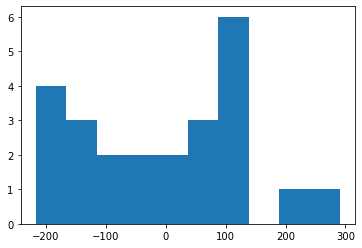

In [70]:
plt.hist(results_N.resid)

Коэффициенты детерминации в случае с моделями линейной регрессии по регионам говорят, скорее, о несостоятельности моделей и не подтверждают зависимость переменных, тем не менее, мы можем наблюдать тенденцию "ниже жесткость воды - выше смертность".
Хотя в случае с таким лаконичным набором данных я бы не взялась делать никаких выводов.   
Из датасета мне не ясно ни кол-во населения каждого города, чтобы понять процент смертности, нет временного периода, по которому можно было бы отследить тенденции изменения летальности и качества воды, чтобы их можно было соотнести, не хватает иных параметров, значимо влияющих на здоровье жителей и продолжительность жизни (промышленность в указанных регионах, уровень жизни, климат, катаклизмы и т.д.)  


На последок посмотрим на показатели жесткости воды. На Севере жить "опаснее".

In [71]:
print(df[df['location'] == 'South']['hardness'].median())
print(df[df['location'] == 'North']['hardness'].median())

75.5
17.0


In [72]:
print(df[df['location'] == 'South']['hardness'].mean())
print(df[df['location'] == 'North']['hardness'].mean())

69.76923076923077
30.4
